In [23]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [74]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
# Ex 1

print('No of training examples: ', train_images.shape[0])
print('No of testing examples: ', test_images.shape[0])

No of training examples:  60000
No of testing examples:  10000


In [17]:
# Ex 2

print('Labels set size: ', len(set(train_labels)))

Labels set size:  10


Image size:  (28, 28)


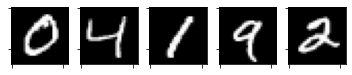

In [33]:
# Ex 3

print('Image size: ', train_images[0].shape)

showed_images_count = 5
for i in range(1, showed_images_count+1):
    ax = plt.subplot(1, showed_images_count, i)
    plt.imshow(train_images[i], cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

In [35]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [37]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [83]:
import numpy as np

def preprocess(data):
    reshaped = np.reshape(data, (data.shape[0], data.shape[1] * data.shape[1]))
    reshaped_float = reshaped.astype('float32')

    normalizer = np.vectorize(lambda v: v/255.)

    return normalizer(reshaped_float)

train_images_preprocessed = preprocess(train_images)
test_images_preprocessed = preprocess(test_images)

In [77]:
train_images_preprocessed.shape
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [76]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [79]:
network.fit(x=train_images_preprocessed, y=train_labels, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0291 - accuracy: 0.9911
Epoch 2/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0218 - accuracy: 0.9936
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0169 - accuracy: 0.9948
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0128 - accuracy: 0.9962
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0091 - accuracy: 0.9975


In [86]:
test_loss, test_acc = network.evaluate(test_images_preprocessed, test_labels)
 
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 21us/step
test_acc: 0.9825000166893005
